In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

valToSelect=1
featureToSelect="lung_disease"
#helperFeatsDrop=[featureToSelect]+["mental_illness_type_anorexia_nervosa",
#"mental_illness_type_bipolar_disorder",
#"mental_illness_type_bulimia_nervosa",
#"mental_illness_type_depression",
#"mental_illness_type_ptsd_posttraumatic_stress_disorder",
#"mental_illness_type_schizophrenia",
#"mental_illness_type_substance_abuse",
#'depression_bipolar_schizophrenia'] # mental_illness
helperFeatsDrop=[featureToSelect] #'lung_disease'
#helperFeatsDrop=[featureToSelect] #'liver_disease'
#helperFeatsDrop=[featureToSelect]#+['diabetes_type'] # diabetes
#helperFeatsDrop=[featureToSelect]+['ibd_diagnosis_refined','ibd_diagnosis'] # ibd

agpDF=pd.read_csv("resultsKNNImputationOnAGPmetadata.csv",low_memory=False)
agpDF=agpDF.set_index(["sample_name","host_subject_id"])

yDF=pd.DataFrame(agpDF[featureToSelect])
yDF

agpDF=agpDF.drop(helperFeatsDrop, axis=1)

X_train, X_val, y_train, y_val = train_test_split(agpDF, yDF, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_val.shape)

(15551, 141)
(3888, 141)


C:\Users\Ryan\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.9140946502057613
0.08590534979423868
0.08590534979423868
Precision: 0.9057283646442871


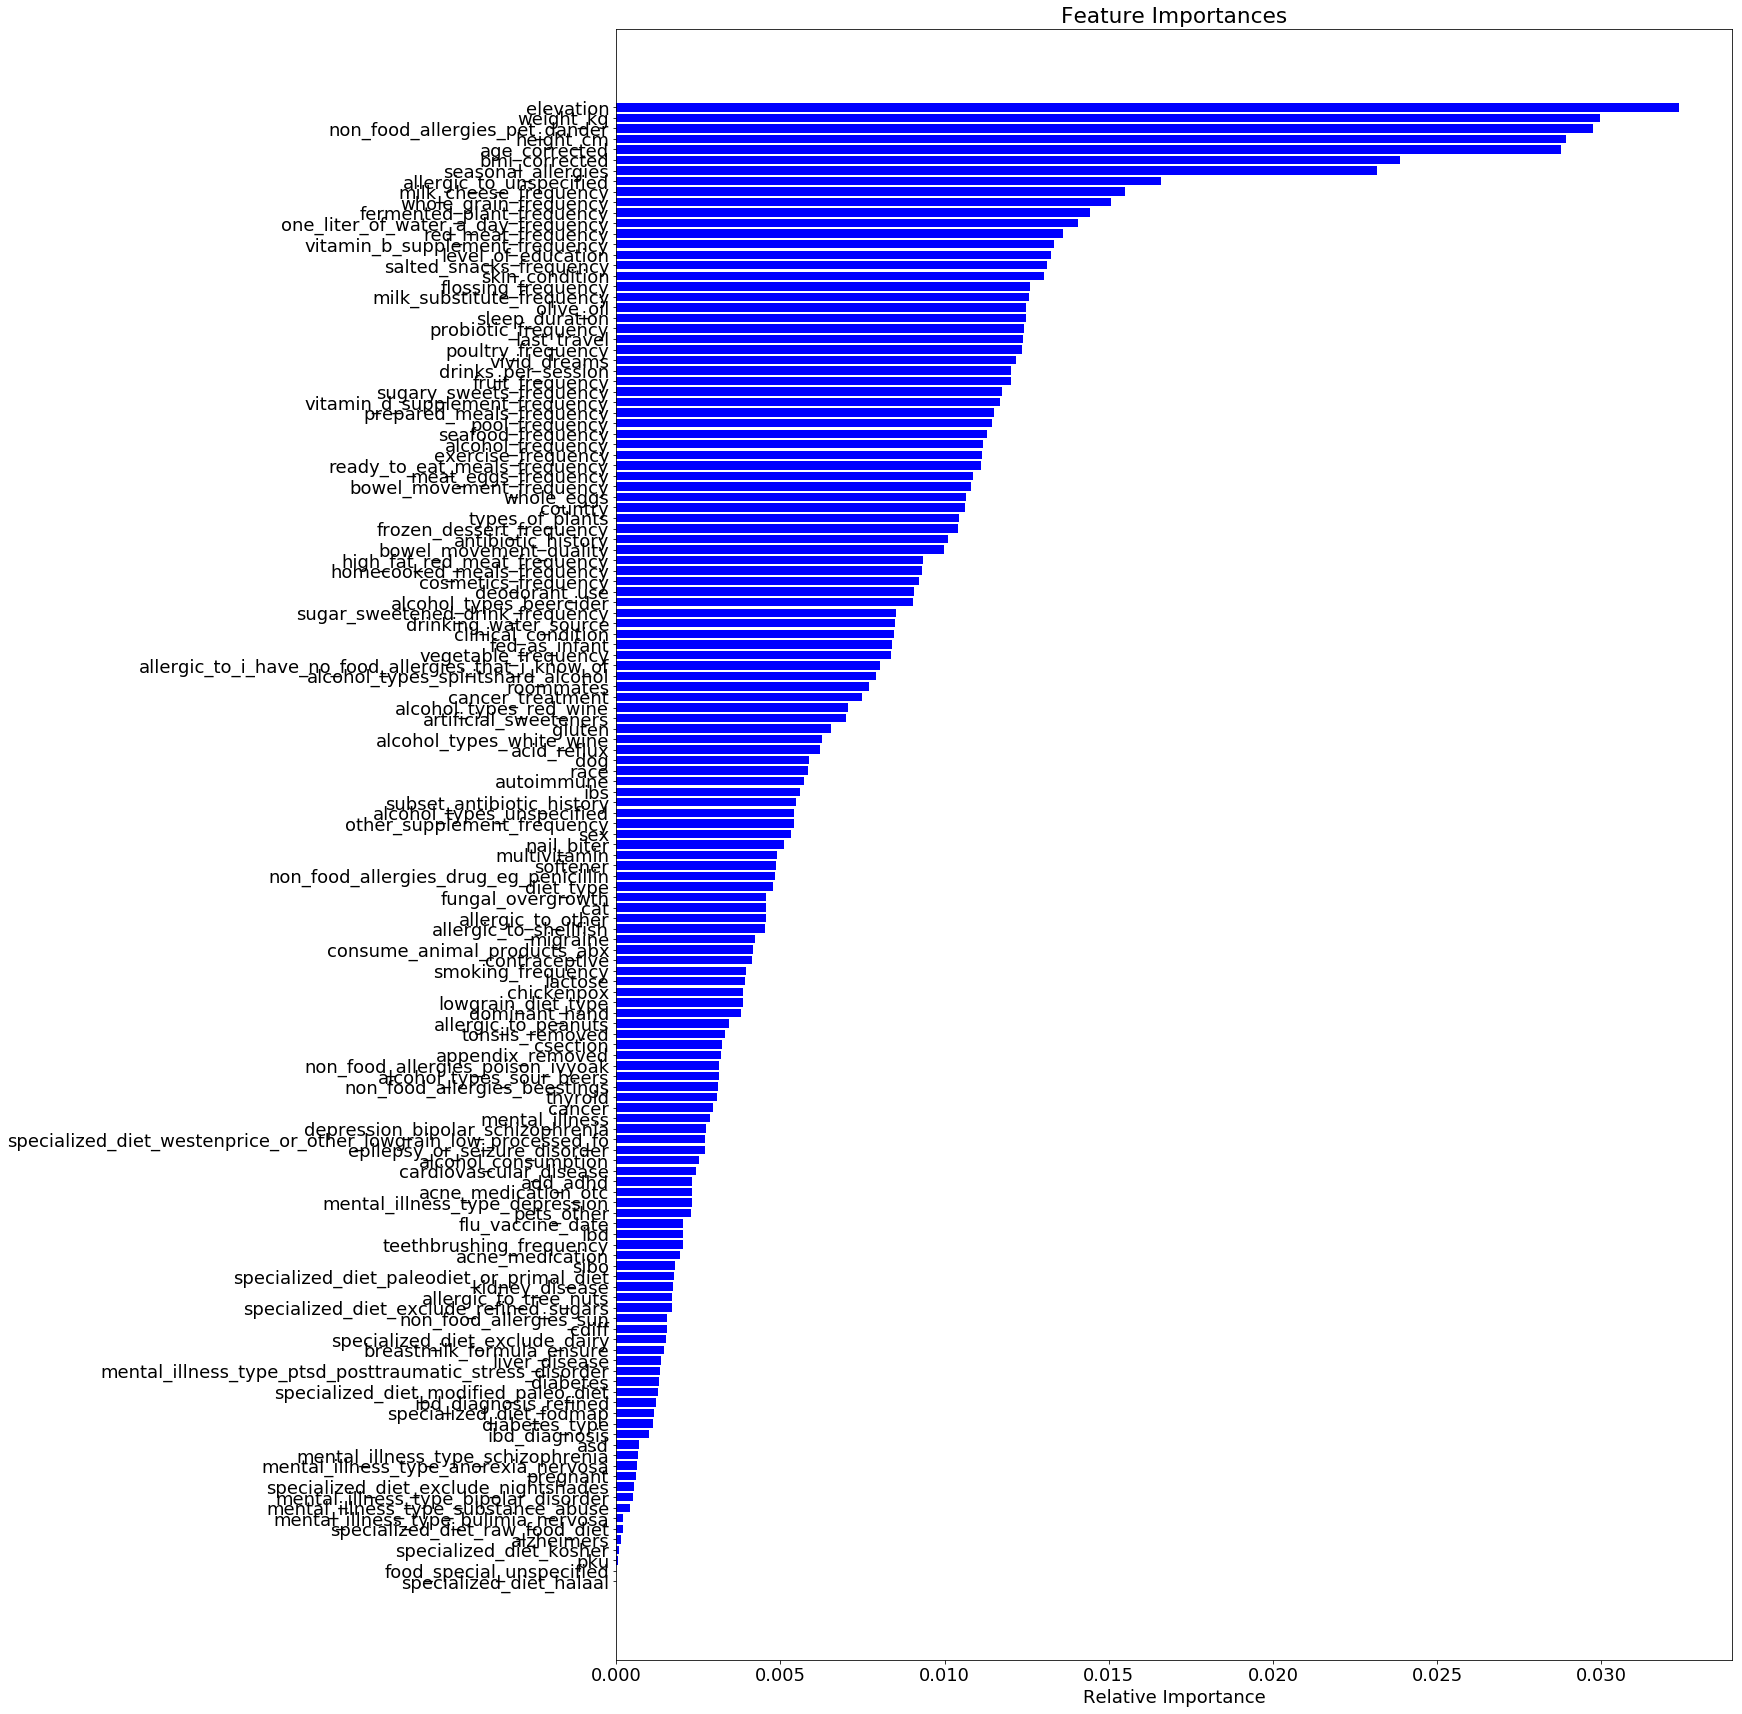

Wall time: 9.6 s


In [132]:
%%time
#Let me begin with a simple RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

clf = RandomForestClassifier(criterion='entropy',n_jobs=-1,n_estimators=10)#,max_leaf_nodes=25,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_val))
print (mean_absolute_error(list(map(int,y_pred)), y_val))
print (mean_absolute_error(y_pred, y_val))
print("Precision: " + str(precision_score(y_val, y_pred, average='macro')))

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,30))
plt.rcParams.update({'font.size': 18})
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()